In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x = pd.read_csv("bank2.dat", sep = "\s+", header=None)

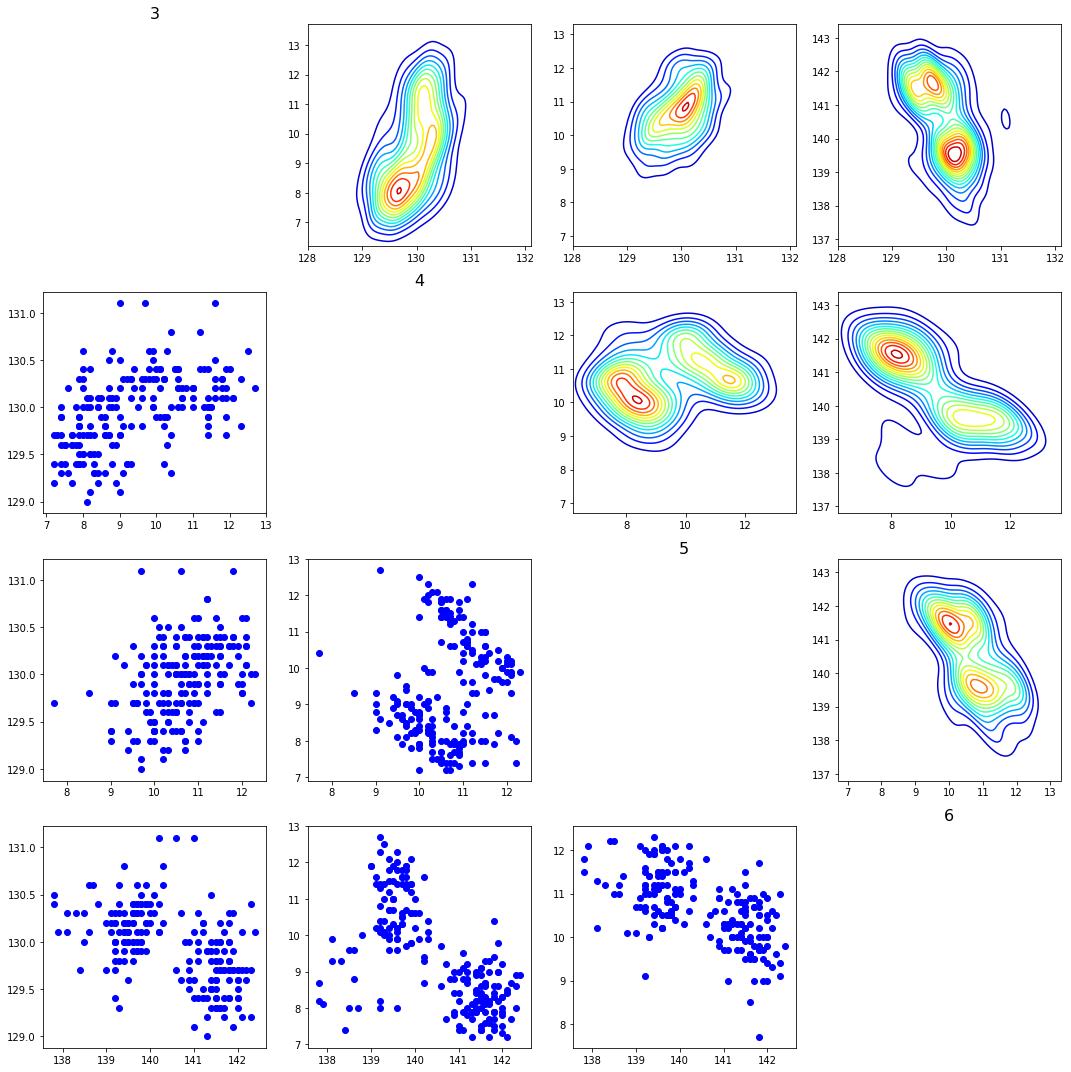

In [73]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))

for i in range(0, 4):
    for j in range(0, 4):
        if i == j:
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            plt.setp(axes[i,j].spines.values(), visible=False)
            axes[i, j].set_title(str(i+3), fontdict = {"fontsize": 16})
        if i < j:
            y_min, y_max, x_min, x_max = [min(x.iloc[:,j+2])-1, max(x.iloc[:,j+2])+1, 
                                          min(x.iloc[:,i+2])-1, max(x.iloc[:,i+2])+1]
            X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
            positions = np.array([X.ravel(), Y.ravel()])
            
            kernel = st.gaussian_kde(np.array([x.iloc[:,i+2], x.iloc[:,j+2]]), bw_method=0.4)
            Z = np.reshape(kernel(positions).T, X.shape)
            axes[i, j].contour(X, Y, Z, cmap="jet", levels = 15)
        if i > j:
            axes[i,j].scatter(x.iloc[:,i+2], x.iloc[:,j+2], c = "blue")

fig.tight_layout()
plt.show()